<a href="https://colab.research.google.com/github/adfhsjt/PCVK25_3F_02/blob/main/Week10_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import filters, io, color, morphology
from skimage.morphology import skeletonize
from skimage import img_as_float

## Dilation

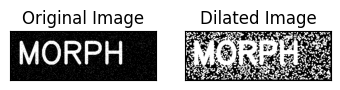

In [21]:
# Dilation without library
def dilate_image(F, w):
    # Image size
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Generate structuring element for dilation (SED)
    SED = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    # Dilation process
    for i in range(constant, p - constant):
        for j in range(constant, q - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)
    return imgD

img_d = cv2.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/noisy_text.png', 0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)

w = 5
imgD = dilate_image(thresh, w)

plt.subplot(131)
plt.imshow(img_d, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(imgD, cmap='gray')
plt.title('Dilated Image')
plt.xticks([]), plt.yticks([])

plt.show()

Kernel:
[[1 1 1]
 [1 1 1]
 [1 1 1]]


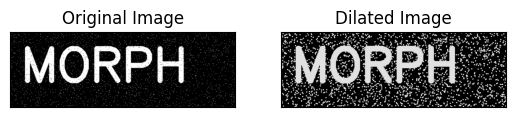

In [22]:
# Dilation with OpenCV library
img = cv2.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/noisy_text.png')
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint16)
dilation = cv2.dilate(thresh, kernel, iterations=1)

print("Kernel:")
print(kernel)

plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(dilation)
plt.title('Dilated Image')
plt.xticks([]), plt.yticks([])

plt.show()

## Erosion

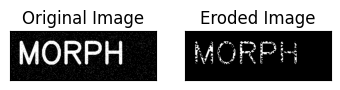

In [23]:
# Erosion without library
def erode_image(F, k):
    # Image size
    m, n = F.shape

    # Generate structuring element for erosion (SE)
    SE = np.ones((k, k), dtype=np.uint8)
    constant = (k - 1) // 2
    imgE = np.zeros((m, n), dtype=np.uint8)

    # Erosion process
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)
    return imgE

img_e = cv2.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/noisy_text.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)

k = 5
imgE = erode_image(thresh1, k)

plt.subplot(131)
plt.imshow(img_e, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(imgE, cmap='gray')
plt.title('Eroded Image')
plt.xticks([]), plt.yticks([])

plt.show()

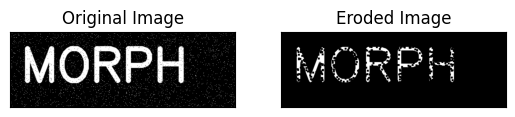

In [24]:
# Erosion with OpenCV library
img = cv2.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/noisy_text.png')
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)

plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(erosion)
plt.title('Eroded Image')
plt.xticks([]), plt.yticks([])

plt.show()

## Opening

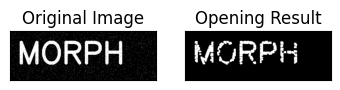

In [25]:
# Opening without library (Erosion then Dilation)
img_o = cv2.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/noisy_text.png', 0)
reto, thresho = cv2.threshold(img_o, 127, 225, cv2.THRESH_BINARY)

k = 7
imgO = dilate_image(erode_image(thresho, k), k)

plt.subplot(131)
plt.imshow(img_o, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(imgO, cmap='gray')
plt.title('Opening Result')
plt.xticks([]), plt.yticks([])

plt.show()

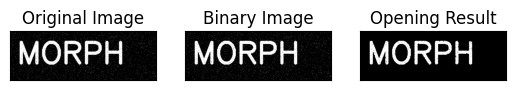

In [26]:
# Opening with OpenCV library
img = cv2.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/noisy_text.png', 0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(thresh, cmap='gray')
plt.title('Binary Image')
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(opening, cmap='gray')
plt.title('Opening Result')
plt.xticks([]), plt.yticks([])

plt.show()

## Closing

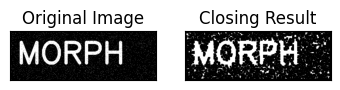

In [27]:
# Closing without library (Dilation then Erosion)
img_c = cv2.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/noisy_text.png', 0)
retc, threshc = cv2.threshold(img_c, 127, 225, cv2.THRESH_BINARY)

k = 7
imgC = erode_image(dilate_image(threshc, k), k)

plt.subplot(131)
plt.imshow(img_c, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(imgC, cmap='gray')
plt.title('Closing Result')
plt.xticks([]), plt.yticks([])

plt.show()

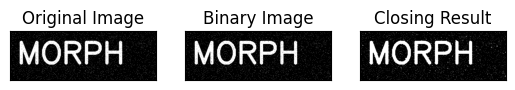

In [28]:
# Closing with OpenCV library
img = cv2.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/noisy_text.png', 0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(thresh, cmap='gray')
plt.title('Binary Image')
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(closing, cmap='gray')
plt.title('Closing Result')
plt.xticks([]), plt.yticks([])

plt.show()

## Dilation with Different Structuring Elements (SE)

Dilation with 3x3 Cross SE


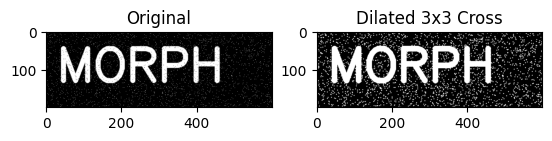

Dilation with 5x5 Cross SE


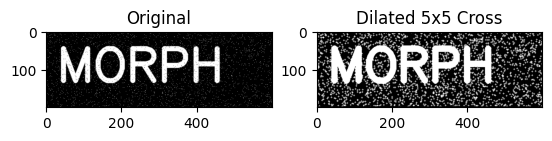

In [29]:
# Dilation with Cross SE
def dilate_cross(F, w):
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    if w == 3:
        SED = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
    elif w == 5:
        SED = np.array([[0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [1, 1, 1, 1, 1],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0]], dtype=np.uint8)
    else:
        # Default to a square SE if w is not 3 or 5
        SED = np.ones((w, w), dtype=np.uint8)

    constant = (w - 1) // 2

    for i in range(constant, p - constant):
        for j in range(constant, q - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)
    return imgD

img_d = cv2.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/noisy_text.png', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)

# Dilation with 3x3 Cross SE
print('Dilation with 3x3 Cross SE')
imgD3 = dilate_cross(thresh, 3)
plt.subplot(121), plt.imshow(img_d, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(imgD3, cmap='gray'), plt.title('Dilated 3x3 Cross')
plt.show()

# Dilation with 5x5 Cross SE
print('Dilation with 5x5 Cross SE')
imgD5 = dilate_cross(thresh, 5)
plt.subplot(121), plt.imshow(img_d, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(imgD5, cmap='gray'), plt.title('Dilated 5x5 Cross')
plt.show()

Dilation with 3x3 Circular SE


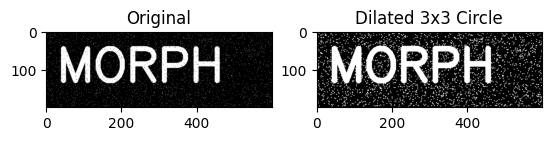

Dilation with 5x5 Circular SE


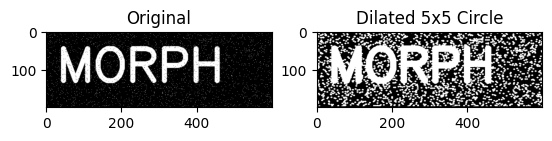

In [30]:
# Dilation with Circular SE
def dilate_circular(F, w):
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)
    SED = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (w, w))
    constant = (w - 1) // 2

    for i in range(constant, p - constant):
        for j in range(constant, q - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)
    return imgD

img_d = cv2.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/noisy_text.png', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)

# Dilation with 3x3 Circular SE
print('Dilation with 3x3 Circular SE')
imgD3 = dilate_circular(thresh, 3)
plt.subplot(121), plt.imshow(img_d, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(imgD3, cmap='gray'), plt.title('Dilated 3x3 Circle')
plt.show()

# Dilation with 5x5 Circular SE
print('Dilation with 5x5 Circular SE')
imgD5 = dilate_circular(thresh, 5)
plt.subplot(121), plt.imshow(img_d, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(imgD5, cmap='gray'), plt.title('Dilated 5x5 Circle')
plt.show()

## Erosion with Different Structuring Elements (SE)

Erosion with 3x5 Rectangle SE


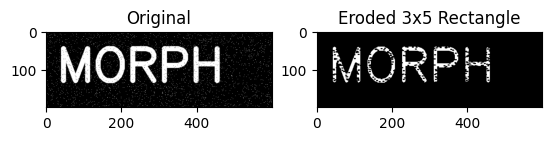

Erosion with 5x7 Rectangle SE


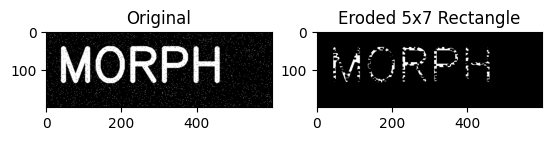

In [31]:
# Erosion with Rectangular SE
def erode_rectangular(F, p, l):
    m, n = F.shape
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (p, l))
    constant1 = (l - 1) // 2
    constant2 = (p - 1) // 2
    imgE = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant1, m - constant1):
        for j in range(constant2, n - constant2):
            temp = F[i - constant1:i + constant1 + 1, j - constant2:j + constant2 + 1]
            product = temp * SE
            # For erosion, you need to check if the SE fits. The min of the product isn't standard.
            # A more standard way is to find the minimum value in the window.
            imgE[i, j] = np.min(temp)
    return imgE

img_e = cv2.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/noisy_text.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)

print('Erosion with 3x5 Rectangle SE')
imgE1 = erode_rectangular(thresh1, 5, 3)
plt.subplot(121), plt.imshow(img_e, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(imgE1, cmap='gray'), plt.title('Eroded 3x5 Rectangle')
plt.show()

print('Erosion with 5x7 Rectangle SE')
imgE2 = erode_rectangular(thresh1, 7, 5)
plt.subplot(121), plt.imshow(img_e, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(imgE2, cmap='gray'), plt.title('Eroded 5x7 Rectangle')
plt.show()

Erosion with Vertical Line SE (k=3)


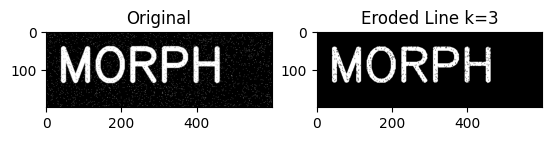

Erosion with Vertical Line SE (k=5)


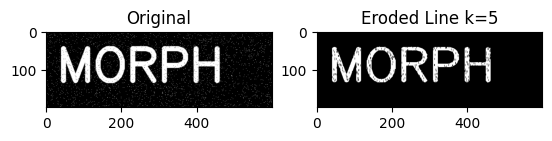

In [32]:
# Erosion with Vertical Line SE
def erode_line_vertical(F, k):
    m, n = F.shape
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (1, k))
    constant = (k - 1) // 2
    imgE = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant, m - constant):
        for j in range(n):
            temp = F[i - constant:i + constant + 1, j]
            imgE[i, j] = np.min(temp)
    return imgE

img_e = cv2.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/noisy_text.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)

print('Erosion with Vertical Line SE (k=3)')
imgE1 = erode_line_vertical(thresh1, 3)
plt.subplot(121), plt.imshow(img_e, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(imgE1, cmap='gray'), plt.title('Eroded Line k=3')
plt.show()

print('Erosion with Vertical Line SE (k=5)')
imgE2 = erode_line_vertical(thresh1, 5)
plt.subplot(121), plt.imshow(img_e, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(imgE2, cmap='gray'), plt.title('Eroded Line k=5')
plt.show()

## Top-Hat and Black-Hat

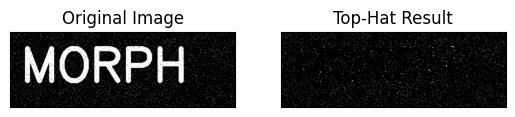

In [33]:
# Top-Hat Operation
filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

input_image = cv2.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/noisy_text.png')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

tophat_img = cv2.morphologyEx(input_image, cv2.MORPH_TOPHAT, kernel)

plt.subplot(121)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(tophat_img, cmap='gray')
plt.title('Top-Hat Result')
plt.xticks([]), plt.yticks([])

plt.show()

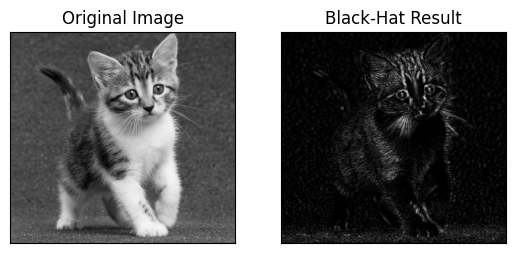

In [34]:
# Black-Hat Operation
img = cv2.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(blackhat, cmap='gray')
plt.title('Black-Hat Result')
plt.xticks([]), plt.yticks([])

plt.show()

## Skeletonization

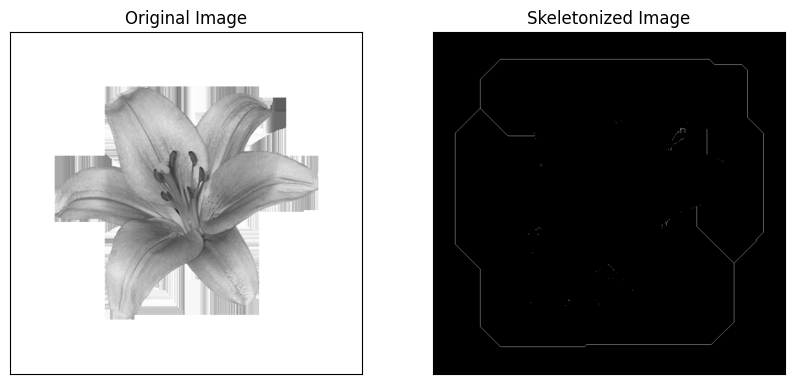

In [42]:
# Skeletonization Example 1
img = cv2.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/lily.png', 0)

# Binarize the image
binary = img > filters.threshold_triangle(img)

# Skeletonize the image (requires boolean input)
skeleton = skeletonize(binary)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(skeleton, cmap='gray')
plt.title('Skeletonized Image')
plt.xticks([]), plt.yticks([])

plt.show()

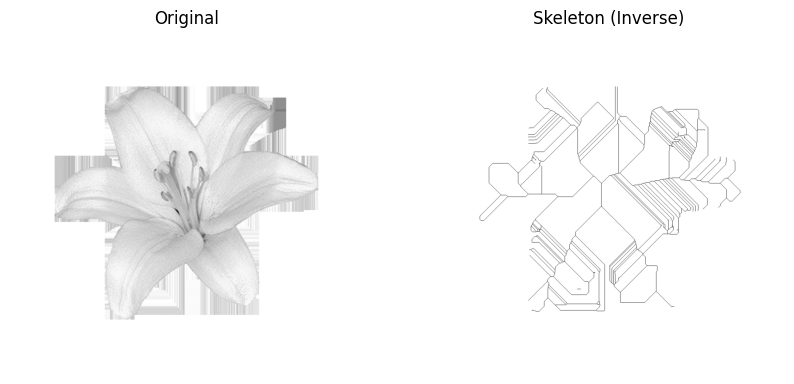

In [41]:
# Skeletonization Example 2 (Inverse)
img = io.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/lily.png')[..., 0]

# Binarize with '<' to make the dark parts 'True'
binary = img < filters.threshold_triangle(img)

# Skeletonize the inverted binary image
skeleton = skeletonize(binary)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(skeleton, cmap='gray_r') # Reversed colormap
ax[1].set_title('Skeleton (Inverse)')
ax[1].set_axis_off()

plt.show()

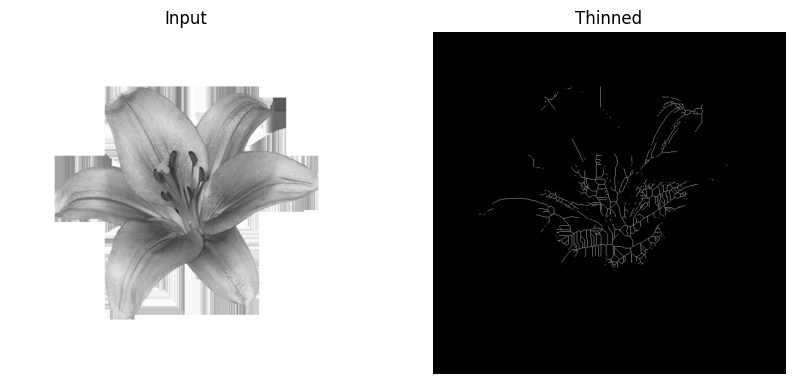

In [39]:
image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/lily.png')[..., :3]))

image_binary = image < 0.5

out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.imshow(image, cmap='gray')
ax0.set_title('Input')
ax0.set_axis_off()

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thinned')
ax1.set_axis_off()

plt.show()